In [1]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.5.0-rc2


### Basic architecture of a [CNN](https://poloclub.github.io/cnn-explainer/#:~:text=A%20convolutional%20neural%20network%2C%20or%20CNN%20for%20short%2C,each%20with%20their%20own%20learnable%20weights%20and%20biases.)

| Hyperparameter/Layer type | Description |
|:-------------------------:|-------------|
|   Input image(s)          | Images for discovering pattern |
|   Input layer             | Takes in target image and preprocess them for further layers     |
|   Convolution layer       | Extracts/Learns most importand patterns from images    |
|   Hidden activation       | Adds non-linearity to learned features       |
|   Pooling layer           | Reduces the dimensionality of learned image features        |
|   Fully connected layer   | Further refines learned features from convolution layers      |
|   Output layer            | Takes learned features and outputs them in shape of target labels       |
|   Output activation       | Adds non-linearity to output layer      |



_It's typically a stack of convolution layer and pooling layers_


For this exercise we are using dataset available at [pizza_steak](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)



In [2]:
# Inspect the data

import pathlib

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([f.name for f in data_dir.glob('*')]))

class_names

array(['pizza', 'steak'], dtype='<U5')

In [3]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, class_names):
    
    target_class = random.sample(list(class_names), 1)[0]
    
    target_folder = os.path.join(target_dir, target_class)
    

    image_path = random.sample(os.listdir(target_folder), 1)[0]
    img = mpimg.imread(os.path.join(target_folder, image_path))
#     img = img/255.0
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    
    print(f'Image shape: {img.shape}') # Show the shape of image

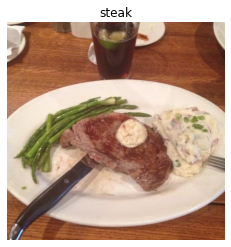

Image shape: (512, 512, 3)


In [4]:
view_random_image('pizza_steak/train/', class_names)

## Steps:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile the CNN model
* Fit the CNN model to our training data

In [22]:
# Set the seed
tf.random.set_seed(42)

# Initalize datagenerator and set it to rescale the pixel values 1/255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

# Setup path to our training samples
train_dir = 'pizza_steak/train/'
val_dir = 'pizza_steak/test/'

# Import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size = (244, 244),
                                              class_mode = 'binary',
                                              seed = 42)

val_data = val_datagen.flow_from_directory(directory = val_dir,
                                              batch_size = 32,
                                              target_size = (244, 244),
                                              class_mode = 'binary',
                                              seed = 42)


# Build CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 240, 240, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 120, 120, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 118, 118, 10)      910       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 116, 116, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 58, 58, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33640)            

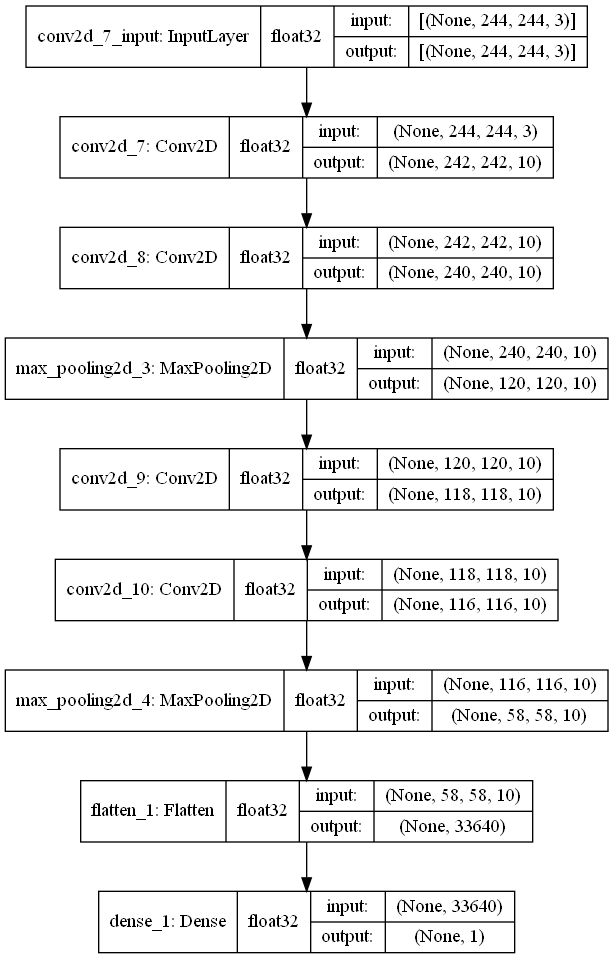

In [24]:
tf.keras.utils.plot_model(model_1, show_shapes= True, show_dtype= True)

In [26]:
# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= val_data,
                        validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 55s 1s/step - loss: 0.5860 - accuracy: 0.7007 - val_loss: 0.4486 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.4365 - accuracy: 0.8053 - val_loss: 0.3561 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.3824 - accuracy: 0.8367 - val_loss: 0.3244 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.3402 - accuracy: 0.8600 - val_loss: 0.3004 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 57s 1s/step - loss: 0.3051 - accuracy: 0.8787 - val_loss: 0.3353 - val_accuracy: 0.8540


In [27]:
model_1.evaluate(val_data)

16/16 [==============================] - 3s 177ms/step - loss: 0.3353 - accuracy: 0.8540


[0.3352750837802887, 0.8539999723434448]

### Building Non-CNN model on our data and comparing it with CNN model

2 hidden layer (4 units each) model

In [28]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (244, 244, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= val_data,
                        validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6938 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 139ms/step - loss: 0.6933 - accuracy: 0.4613 - val_loss: 0.6931 - val_accuracy: 0.5000


In [29]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 178608)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 714436    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 714,461
Trainable params: 714,461
Non-trainable params: 0
_________________________________________________________________


**Previous model was just guessing on the validation data, let's try and compilcate the model(increase layers and units in each layers)**

In [30]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (244, 244, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data= val_data,
                        validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 11s 223ms/step - loss: 2.3498 - accuracy: 0.6473 - val_loss: 1.0551 - val_accuracy: 0.5920
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 1.0023 - accuracy: 0.6800 - val_loss: 0.5429 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6363 - accuracy: 0.7493 - val_loss: 0.6100 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.7420 - accuracy: 0.7193 - val_loss: 0.5667 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.8593 - accuracy: 0.7433 - val_loss: 0.8012 - val_accuracy: 0.7060


In [31]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 178608)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               17860900  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 17,881,201
Trainable params: 17,881,201
Non-trainable params: 0
_________________________________________________________________


**Note:** Model 3 is performing better as compared to model 2 but still not better than CNN but it has approximately **500x** more trainable parameters as compared to the CNN model which makes it realy hard to scale up.